In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

source = 'https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/refs/heads/main/missions/W1/mtcars.csv'
df_mtcars = pd.read_csv(source)

# 데이터셋의 컬럼 중 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경하세요.
df_mtcars.rename(columns={'Unnamed: 0':'model'}, inplace=True)

In [4]:
def mile_to_km(mile):
    return mile * 1.60934
def gallon_to_liter(gallon):
    return gallon * 3.78541
def mpg_to_kpl(mpg):
    return mpg * 0.425143  # mpg * mile_to_km(1) / gallon_to_liter(1)
def inch_to_cc(inch):
    return inch * 2.54
def cubic_inch_to_cc(cubic_inch):
    return cubic_inch * 16.3871 # cubic_inch * inch_to_cc(1) ** 3
def pound_to_kg(pound):
    return pound * 0.453592
def pound1000_to_ton(pound1000):
    return pound1000 * 0.453592

df_mtcars_metric = df_mtcars.copy()
df_mtcars_metric['mpg'] = df_mtcars_metric.apply(lambda row: mpg_to_kpl(row['mpg']), axis=1)
df_mtcars_metric['disp'] = df_mtcars_metric.apply(lambda row: cubic_inch_to_cc(row['disp']), axis=1)
df_mtcars_metric['wt'] = df_mtcars_metric.apply(lambda row: pound1000_to_ton(row['wt']), axis=1)
df_mtcars_metric = df_mtcars_metric.rename(columns={'mpg': 'kpl', 'disp': 'cc', 'wt': 'ton'})

In [5]:
df_mtcars_metric.head()

,model,kpl,cyl,cc,hp,drat,ton,qsec,vs,am,gear,carb
0,Mazda RX4,8.928003,6,2621.9360,110,3.90,1.188411,16.46,0,1,4,4
1,Mazda RX4 Wag,8.928003,6,2621.9360,110,3.90,1.304077,17.02,0,1,4,4
2,Datsun 710,9.693260,4,1769.8068,93,3.85,1.052333,18.61,1,1,4,1
3,Hornet 4 Drive,9.098060,6,4227.8718,110,3.08,1.458298,19.44,1,0,3,1
4,Hornet Sportabout,7.950174,8,5899.3560,175,3.15,1.560356,17.02,0,0,3,2


In [6]:
df_mtcars_metric.tail()

,model,kpl,cyl,cc,hp,drat,ton,qsec,vs,am,gear,carb
27,Lotus Europa,12.924347,4,1558.41321,113,3.77,0.686285,16.9,1,1,5,2
28,Ford Pantera L,6.717259,8,5751.87210,264,4.22,1.437887,14.5,0,1,5,4
29,Ferrari Dino,8.375317,6,2376.12950,175,3.62,1.256450,15.5,0,1,5,6
30,Maserati Bora,6.377145,8,4932.51710,335,3.54,1.619323,14.6,0,1,5,8
31,Volvo 142E,9.098060,4,1982.83910,109,4.11,1.260986,18.6,1,1,4,2


In [7]:
row_counts = df_mtcars_metric.shape[0]
print(row_counts)

32


In [8]:
df_mtcars_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   kpl     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   cc      32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   ton     32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [9]:
df_mtcars_metric.dtypes

model     object
kpl      float64
cyl        int64
cc       float64
hp         int64
drat     float64
ton      float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [10]:
desc = df_mtcars_metric.describe()
cv = (desc.loc['std'] / desc.loc['mean']) * 100
desc.loc['cv'] = cv

desc

,kpl,cyl,cc,hp,drat,ton,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,8.541389,6.187500,3780.862438,146.687500,3.596563,1.459319,17.848750,0.437500,0.406250,3.687500,2.812500
std,2.562315,1.785922,2030.995770,68.562868,0.534679,0.443820,1.786943,0.504016,0.498991,0.737804,1.615200
min,4.421487,4.000000,1165.122810,52.000000,2.760000,0.686285,14.500000,0.000000,0.000000,3.000000,1.000000
25%,6.557831,4.000000,1979.971358,96.500000,3.080000,1.170834,16.892500,0.000000,0.000000,3.000000,2.000000
50%,8.162746,6.000000,3216.787730,123.000000,3.695000,1.508193,17.710000,0.000000,0.000000,4.000000,2.000000
75%,9.693260,8.000000,5342.194600,180.000000,3.920000,1.637467,18.900000,1.000000,1.000000,4.000000,4.000000
max,14.412348,8.000000,7734.711200,335.000000,4.930000,2.460283,22.900000,1.000000,1.000000,5.000000,8.000000
cv,29.998808,28.863380,53.717791,46.740771,14.866382,30.412851,10.011588,115.203687,122.828533,20.008246,57.429333


# gear x transmission 조합 구하기

In [11]:
def get_unique_values_count(df, column_name):
    return len(df[column_name].unique())

print('gear의 수:', get_unique_values_count(df_mtcars_metric, 'gear'))
print('am의 수:', get_unique_values_count(df_mtcars_metric, 'am'))

gear의 수: 3
am의 수: 2


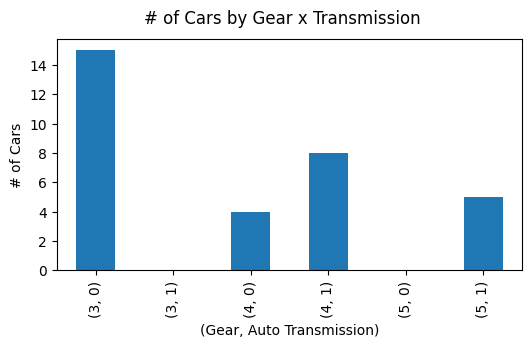

Transmission,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [12]:
fig, axes = plt.subplots(figsize=(6, 3))

crosstab = pd.crosstab(df_mtcars_metric['gear'], df_mtcars_metric['am']).rename_axis(columns={'am':'Transmission'})
ax = crosstab.stack().plot.bar(ax=axes)

plt.suptitle('# of Cars by Gear x Transmission')
plt.ylabel('# of Cars')
plt.xlabel('(Gear, Auto Transmission)')
plt.show()

crosstab

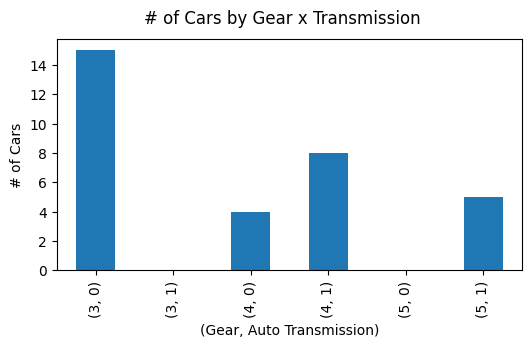

Transmission,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [13]:
fig, axes = plt.subplots(figsize=(6, 3))

groupby = df_mtcars_metric.groupby(['gear', 'am']).size().unstack(fill_value=0).rename_axis(columns={'am':'Transmission'})
ax = groupby.stack().plot.bar(ax=axes)

plt.suptitle('# of Cars by Gear x Transmission')
plt.ylabel('# of Cars')
plt.xlabel('(Gear, Auto Transmission)')
plt.show()

groupby

# Features 히스토그램

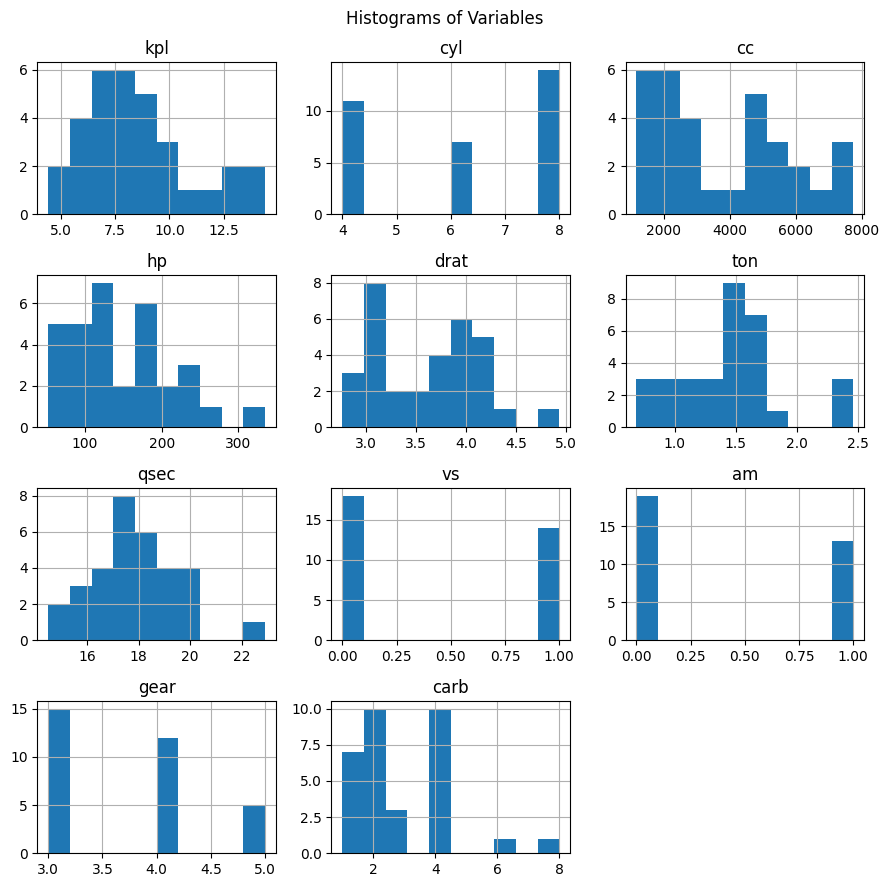

In [14]:
df_mtcars_metric.hist(figsize=(9, 9))
plt.suptitle("Histograms of Variables")
plt.tight_layout()
plt.show()

# Features 상관관계

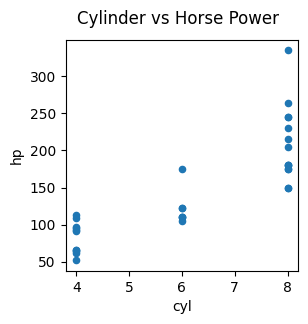

In [15]:
fig, axes = plt.subplots(figsize=(3, 3))
df_mtcars_metric.plot(x='cyl', y='hp', kind='scatter', ax=axes)
plt.suptitle("Cylinder vs Horse Power")
plt.show()

# plt.scatter()

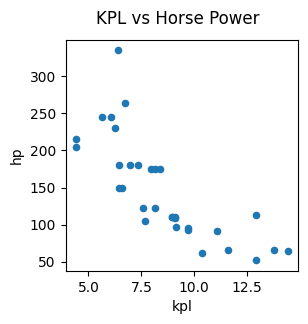

In [16]:
fig, axes = plt.subplots(figsize=(3, 3))
df_mtcars_metric.plot(x='kpl', y='hp', kind='scatter', ax=axes)
plt.suptitle("KPL vs Horse Power")
plt.show()

In [17]:
model_except = df_mtcars_metric.drop(columns=['model'])
correlation_matrix = model_except.corr(method='pearson')

pd.DataFrame(correlation_matrix)

,kpl,cyl,cc,hp,drat,ton,qsec,vs,am,gear,carb
kpl,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
cc,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
ton,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


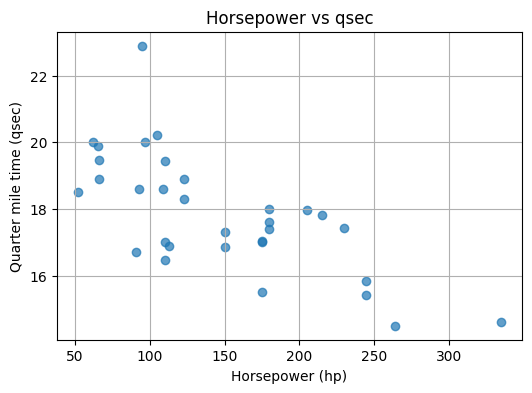

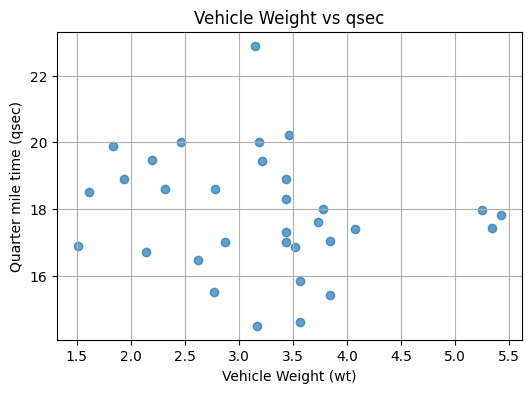

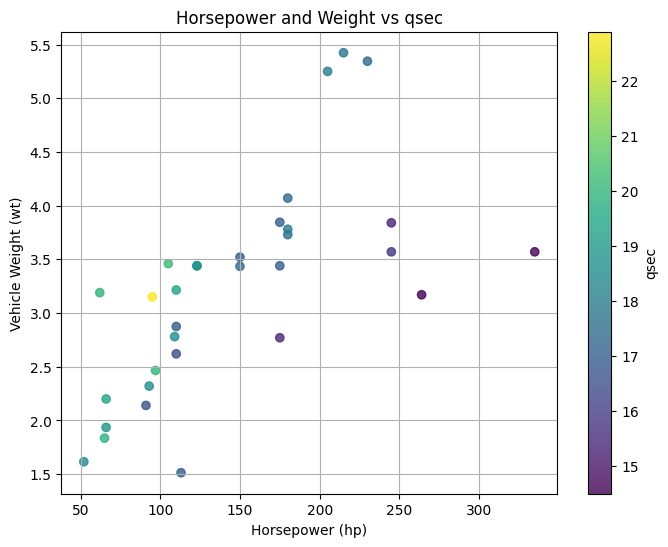

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

source = 'https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/refs/heads/main/missions/W1/mtcars.csv'
df = pd.read_csv(source)

# 마력 vs qsec 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df['hp'], df['qsec'], alpha=0.7)
plt.title('Horsepower vs qsec')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Quarter mile time (qsec)')
plt.grid(True)
plt.show()

# 차량 중량 vs qsec 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df['wt'], df['qsec'], alpha=0.7)
plt.title('Vehicle Weight vs qsec')
plt.xlabel('Vehicle Weight (wt)')
plt.ylabel('Quarter mile time (qsec)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['hp'], df['wt'], c=df['qsec'], cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='qsec')
plt.title('Horsepower and Weight vs qsec')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Vehicle Weight (wt)')
plt.grid(True)
plt.show()

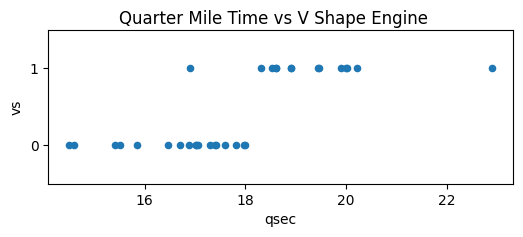

In [28]:
fig, axes = plt.subplots(figsize=(6, 2))
df_mtcars_metric.plot(x='qsec', y='vs', kind='scatter', ax=axes)
axes.set_yticks([0, 1])

plt.suptitle("Quarter Mile Time vs V Shape Engine")
axes.set_ylim(-0.5, 1.5)
plt.show()